# Rust ndarray Quick Intro
ref: https://docs.rs/ndarray/latest/ndarray/doc/ndarray_for_numpy_users/index.html

In [2]:
// Install the crate
:dep ndarray = {version = "0.15.6"}
// The very first move
use ndarray::prelude::*;


In [3]:
// adjust settings to show types
:types

Types: true


### Construct an ndarray
n-dimensional array

In [4]:
let y = array! [[1,2,3], [4,5,6], [7,8, 9]];
y

: ArrayBase<OwnedRepr<i32>, Dim<[usize; 2]>> = [[1, 2, 3],
 [4, 5, 6],
 [7, 8, 9]], shape=[3, 3], strides=[3, 1], layout=Cc (0x5), const ndim=2

In [5]:
// convert to f64 array
let y = y.mapv(|x| f64::from(x));
y

: ArrayBase<OwnedRepr<f64>, Dim<[usize; 2]>> = [[1.0, 2.0, 3.0],
 [4.0, 5.0, 6.0],
 [7.0, 8.0, 9.0]], shape=[3, 3], strides=[3, 1], layout=Cc (0x5), const ndim=2

In [6]:
// array with char type and &str type also works
dbg!(array!['a', 'b', 'c']);
dbg!(array!["aa", "bb", "cc"]);

[src/lib.rs:98] array!['a', 'b', 'c'] = ['a', 'b', 'c'], shape=[3], strides=[1], layout=CFcf (0xf), const ndim=1
[src/lib.rs:99] array!["aa", "bb", "cc"] = ["aa", "bb", "cc"], shape=[3], strides=[1], layout=CFcf (0xf), const ndim=1


# always aware of what dtype and shape your arrays have

In [7]:
y.shape()

: &[usize] = [3, 3]

In [9]:
dbg!(&y)

The type of the variable y was redefined, so was lost.


Error: cannot find value `y` in this scope

### There are many ways to visualize the ndarray

In [8]:
:dep plotters = { version = "^0.3.0", default_features = false, features = ["evcxr", "all_series"] }

In [10]:
extern crate plotters;
// Import all the plotters prelude functions
use plotters::prelude::*;
// To create a figure that can be displayed in Jupyter notebook, use evcxr_figure function.
// The first param is the resolution of the figure.
// The second param is the closure that performes the drawing.
evcxr_figure((300, 100), |root| {
    // Do the drawings
    root.fill(&BLUE)?;
    // Tell plotters that everything is ok
    Ok(())
})

In [11]:
// to visualize an 1-d array, we can simply plot it
//install the plotter
:dep plotters = { version = "^0.3.0", default_features = false, features = ["evcxr", "all_series"] }


In [13]:
fn array_max<'a, T: PartialOrd>( arr: &'a Array1<T>) -> Option<&'a T> {
    arr.iter().max_by(|a, b| a.partial_cmp(b).unwrap())
}

fn array_min<'a, T: PartialOrd>( arr: &'a Array1<T>) -> Option<&'a T> {
    arr.iter().min_by(|a, b| a.partial_cmp(b).unwrap())
}

#[allow(unused_macros)]
macro_rules! plot_array {
    ($expr:expr) => {
    {
    let arr = $expr;
evcxr_figure((640, 480), |root| {
    // The following code will create a chart context
    let series_len = arr.shape()[0];
    let series_max = *array_max(arr).unwrap() as f32;
    let series_min = *array_min(arr).unwrap() as f32;
    let mut chart = ChartBuilder::on(&root)
        .caption("this is a chart", ("Arial", 20).into_font())
        .x_label_area_size(40)
        .y_label_area_size(40)
        .build_cartesian_2d(-0.5f32..((series_len as f32)-0.5f32), (series_min-0.5)..(series_max+0.5))?;
    // Then we can draw a series on it!
    chart.configure_mesh().draw()?;
    chart.draw_series(
        arr.iter().enumerate().map(|(x, y)| {            
                Circle::new((x as f32, *y as f32), 5, RED.filled())
    })    
    )?;
    Ok(())
}).style("width:60%")
    }
    }
}
plot_array!(&array![3., 2., 1., 2.])

this is a chart
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
0.5
 
 
 
1.0
 
 
 
1.5
 
 
 
2.0
 
 
 
2.5
 
 
 
3.0
 
 
 
3.5
 
 
 
 
-0.5
 
 
 
0.0
 
 
 
0.5
 
 
 
1.0
 
 
 
1.5
 
 
 
2.0
 
 
 
2.5
 
 
 
3.0
 
 
 
3.5

In [14]:
plot_array!(&array![3, 2, 1, 2])

this is a chart
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
0.5
 
 
 
1.0
 
 
 
1.5
 
 
 
2.0
 
 
 
2.5
 
 
 
3.0
 
 
 
3.5
 
 
 
 
-0.5
 
 
 
0.0
 
 
 
0.5
 
 
 
1.0
 
 
 
1.5
 
 
 
2.0
 
 
 
2.5
 
 
 
3.0
 
 
 
3.5

In [15]:
fn plt<T: PartialOrd+Clone>(arr: Array1<T>) -> plotters::evcxr::SVGWrapper where f64: From<T>
{    
evcxr_figure((640, 480), |root| {
    // The following code will create a chart context
    let series_len = arr.shape()[0];
    let series_max = f64::from(array_max(&arr).unwrap().clone()) as f32;
    let series_min = f64::from(array_min(&arr).unwrap().clone()) as f32;
    let mut chart = ChartBuilder::on(&root)
        .caption("this is a chart", ("Arial", 20).into_font())
        .x_label_area_size(40)
        .y_label_area_size(40)
        .build_cartesian_2d(-0.5f32..((series_len as f32)-0.5f32), (series_min-0.5)..(series_max+0.5))?;
    // Then we can draw a series on it!
    chart.configure_mesh().draw()?;
    chart.draw_series((0..series_len).map(|x|{
        let y = f64::from(arr[x].clone()) as f32;
        Circle::new(((x as f32), y), 5, RED.filled())
    }))?;
    Ok(())
}).style("width:60%")
}
plt(array![100,99,3,111])

this is a chart
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
10.0
 
 
 
20.0
 
 
 
30.0
 
 
 
40.0
 
 
 
50.0
 
 
 
60.0
 
 
 
70.0
 
 
 
80.0
 
 
 
90.0
 
 
 
100.0
 
 
 
110.0
 
 
 
 
-0.5
 
 
 
0.0
 
 
 
0.5
 
 
 
1.0
 
 
 
1.5
 
 
 
2.0
 
 
 
2.5
 
 
 
3.0
 
 
 
3.5

### There are many ways to build an array

In [16]:
Array::<f32, _>::zeros((3, 2, 4))

: ArrayBase<OwnedRepr<f32>, Dim<[usize; 3]>> = [[[0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0]],

 [[0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0]],

 [[0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0]]], shape=[3, 2, 4], strides=[8, 4, 1], layout=Cc (0x5), const ndim=3

In [17]:
 Array3::<f64>::zeros((3, 2, 4))

: ArrayBase<OwnedRepr<f64>, Dim<[usize; 3]>> = [[[0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0]],

 [[0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0]],

 [[0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0]]], shape=[3, 2, 4], strides=[8, 4, 1], layout=Cc (0x5), const ndim=3

In [18]:
 Array3::<f64>::zeros((3, 2, 4).f())

: ArrayBase<OwnedRepr<f64>, Dim<[usize; 3]>> = [[[0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0]],

 [[0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0]],

 [[0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0]]], shape=[3, 2, 4], strides=[1, 3, 6], layout=Ff (0xa), const ndim=3

In [19]:
Array::from_elem((3, 2, 4), 7.1f32)

: ArrayBase<OwnedRepr<f32>, Dim<[usize; 3]>> = [[[7.1, 7.1, 7.1, 7.1],
  [7.1, 7.1, 7.1, 7.1]],

 [[7.1, 7.1, 7.1, 7.1],
  [7.1, 7.1, 7.1, 7.1]],

 [[7.1, 7.1, 7.1, 7.1],
  [7.1, 7.1, 7.1, 7.1]]], shape=[3, 2, 4], strides=[8, 4, 1], layout=Cc (0x5), const ndim=3

In [19]:
Array::<f32, _>::ones((3, 2, 4))

: ArrayBase<OwnedRepr<f32>, Dim<[usize; 3]>> = [[[1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0]],

 [[1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0]],

 [[1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0]]], shape=[3, 2, 4], strides=[8, 4, 1], layout=Cc (0x5), const ndim=3

In [20]:
Array::range(0., 10., 0.5)

: ArrayBase<OwnedRepr<f64>, Dim<[usize; 1]>> = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5], shape=[20], strides=[1], layout=CFcf (0xf), const ndim=1

In [21]:
// note the limitation for numerical compuation
0.1 + 0.2 == 0.3

: bool = false

In [22]:
Array::linspace(0., 10., 11)

: ArrayBase<OwnedRepr<f64>, Dim<[usize; 1]>> = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], shape=[11], strides=[1], layout=CFcf (0xf), const ndim=1

In [23]:
Array2::<f64>::eye(5)

: ArrayBase<OwnedRepr<f64>, Dim<[usize; 2]>> = [[1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0]], shape=[5, 5], strides=[5, 1], layout=Cc (0x5), const ndim=2

In [24]:
Array2::from_diag(&array![1,2,3,4,5])

: ArrayBase<OwnedRepr<i32>, Dim<[usize; 2]>> = [[1, 0, 0, 0, 0],
 [0, 2, 0, 0, 0],
 [0, 0, 3, 0, 0],
 [0, 0, 0, 4, 0],
 [0, 0, 0, 0, 5]], shape=[5, 5], strides=[5, 1], layout=Cc (0x5), const ndim=2

In [25]:
// use ndarray-rand crate to generate random array
:dep ndarray-rand
use ndarray_rand::RandomExt;
use ndarray_rand::rand_distr::Uniform;
let a = Array::random((2, 2), Uniform::new(0., 10.));
println!("{a:7.4?}");

[[ 9.1139,  6.2487],
 [ 4.4852,  5.6878]], shape=[2, 2], strides=[2, 1], layout=Cc (0x5), const ndim=2


In [26]:
let arr = Array::random(40, Uniform::new(0., 1.));
plot_array!(&arr)

this is a chart
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-0.4
 
 
 
-0.2
 
 
 
-0.0
 
 
 
0.2
 
 
 
0.4
 
 
 
0.6
 
 
 
0.8
 
 
 
1.0
 
 
 
1.2
 
 
 
1.4
 
 
 
 
0.0
 
 
 
5.0
 
 
 
10.0
 
 
 
15.0
 
 
 
20.0
 
 
 
25.0
 
 
 
30.0
 
 
 
35.0

Arrays are data stored in a computer. When you see a bunch of data stored in a computer, you can check

* What information does the data contain?
* What are the restrictions on this data or object?
* What do these restrictions mean? benefit?
* How can it be used (operation)?
* Have you encountered anything similar before?
* What can it be applied to?


The most common and basic operations on arrays are  **elementwise operation*

`arr.mapv` does exactly that

In [27]:
let x = Array::linspace(0., 8., 100);
plot_array!(&x.mapv(f64::sin))

this is a chart
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
-1.0
 
 
 
-0.5
 
 
 
0.0
 
 
 
0.5
 
 
 
1.0
 
 
 
 
0.0
 
 
 
10.0
 
 
 
20.0
 
 
 
30.0
 
 
 
40.0
 
 
 
50.0
 
 
 
60.0
 
 
 
70.0
 
 
 
80.0
 
 
 
90.0

In [28]:
plot_array!(&x.mapv(f64::exp))

this is a chart
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
500.0
 
 
 
1000.0
 
 
 
1500.0
 
 
 
2000.0
 
 
 
2500.0
 
 
 
 
0.0
 
 
 
10.0
 
 
 
20.0
 
 
 
30.0
 
 
 
40.0
 
 
 
50.0
 
 
 
60.0
 
 
 
70.0
 
 
 
80.0
 
 
 
90.0

In [29]:
plot_array!(&x.mapv(|s| {(s-3.).powf(2.)+1.}))

this is a chart
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
5.0
 
 
 
10.0
 
 
 
15.0
 
 
 
20.0
 
 
 
25.0
 
 
 
 
0.0
 
 
 
10.0
 
 
 
20.0
 
 
 
30.0
 
 
 
40.0
 
 
 
50.0
 
 
 
60.0
 
 
 
70.0
 
 
 
80.0
 
 
 
90.0

In [30]:
let a1 = Array::range(0., 10., 1.);
let x = a1.clone().into_shape([10, 1]).unwrap();
let y = a1.clone().into_shape([1, 10]).unwrap();
&x * &x + &y * &y

: ArrayBase<OwnedRepr<f64>, Dim<[usize; 2]>> = [[0.0, 1.0, 4.0, 9.0, 16.0, 25.0, 36.0, 49.0, 64.0, 81.0],
 [1.0, 2.0, 5.0, 10.0, 17.0, 26.0, 37.0, 50.0, 65.0, 82.0],
 [4.0, 5.0, 8.0, 13.0, 20.0, 29.0, 40.0, 53.0, 68.0, 85.0],
 [9.0, 10.0, 13.0, 18.0, 25.0, 34.0, 45.0, 58.0, 73.0, 90.0],
 [16.0, 17.0, 20.0, 25.0, 32.0, 41.0, 52.0, 65.0, 80.0, 97.0],
 [25.0, 26.0, 29.0, 34.0, 41.0, 50.0, 61.0, 74.0, 89.0, 106.0],
 [36.0, 37.0, 40.0, 45.0, 52.0, 61.0, 72.0, 85.0, 100.0, 117.0],
 [49.0, 50.0, 53.0, 58.0, 65.0, 74.0, 85.0, 98.0, 113.0, 130.0],
 [64.0, 65.0, 68.0, 73.0, 80.0, 89.0, 100.0, 113.0, 128.0, 145.0],
 [81.0, 82.0, 85.0, 90.0, 97.0, 106.0, 117.0, 130.0, 145.0, 162.0]], shape=[10, 10], strides=[10, 1], layout=Cc (0x5), const ndim=2

In [31]:
{
    let a1 = Array::range(0., 10., 1.);
    let x = & a1.clone().into_shape([10, 1]).unwrap();
    let y = & a1.clone().into_shape([1, 10]).unwrap();
    x * x + y * y
}

: ArrayBase<OwnedRepr<f64>, Dim<[usize; 2]>> = [[0.0, 1.0, 4.0, 9.0, 16.0, 25.0, 36.0, 49.0, 64.0, 81.0],
 [1.0, 2.0, 5.0, 10.0, 17.0, 26.0, 37.0, 50.0, 65.0, 82.0],
 [4.0, 5.0, 8.0, 13.0, 20.0, 29.0, 40.0, 53.0, 68.0, 85.0],
 [9.0, 10.0, 13.0, 18.0, 25.0, 34.0, 45.0, 58.0, 73.0, 90.0],
 [16.0, 17.0, 20.0, 25.0, 32.0, 41.0, 52.0, 65.0, 80.0, 97.0],
 [25.0, 26.0, 29.0, 34.0, 41.0, 50.0, 61.0, 74.0, 89.0, 106.0],
 [36.0, 37.0, 40.0, 45.0, 52.0, 61.0, 72.0, 85.0, 100.0, 117.0],
 [49.0, 50.0, 53.0, 58.0, 65.0, 74.0, 85.0, 98.0, 113.0, 130.0],
 [64.0, 65.0, 68.0, 73.0, 80.0, 89.0, 100.0, 113.0, 128.0, 145.0],
 [81.0, 82.0, 85.0, 90.0, 97.0, 106.0, 117.0, 130.0, 145.0, 162.0]], shape=[10, 10], strides=[10, 1], layout=Cc (0x5), const ndim=2

In [32]:
:dep image = "0.23"
:dep evcxr_image = "1.1"
use evcxr_image::ImageDisplay;

In [33]:
use image::RgbImage;
fn array_to_image(arr: &Array3<u8>) -> RgbImage {
    assert!(arr.is_standard_layout());

    let (height, width, _) = arr.dim();
    let raw = arr.clone().into_raw_vec();
    RgbImage::from_raw(width as u32, height as u32, raw)
        .expect("container should have the right size for the image dimensions")
}

In [34]:
let mut arr: Array3<u8> = Array3::zeros((600, 600, 3));
let (height, width, _) = arr.dim();
let height = i32::try_from(height).unwrap();
let width = i32::try_from(width).unwrap();
for y in 0..height {
    for x in 0..width {
        if (y-300).pow(2)+(x-300).pow(2) < 250i32.pow(2) {
            arr.slice_mut(s![y,x,..]).assign(&array![255,255,0])
        }
}
}
array_to_image(&arr);

The type of the variable a was redefined, so was lost.
The type of the variable x was redefined, so was lost.
The type of the variable y was redefined, so was lost.
The type of the variable arr was redefined, so was lost.
The type of the variable a1 was redefined, so was lost.


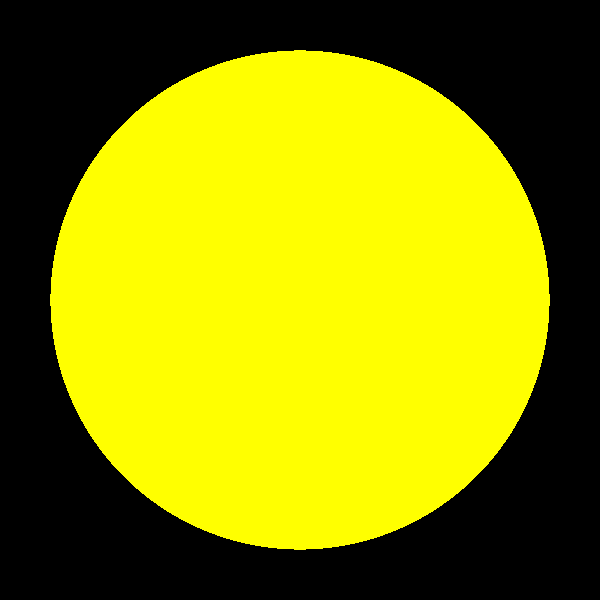

In [35]:
{
    let mut arr: Array3<u8> = Array3::zeros((600, 600, 3));
    let a1 = Array::linspace(-300., 300., 600);
    let x = &a1.clone().into_shape([600, 1]).unwrap();
    let y = &a1.clone().into_shape([1, 600]).unwrap();
    let c = (x*x + y*y) 
            .mapv(|v| v<250f64.powi(2))
            .mapv(|v| 255*u8::from(v));
    arr.slice_mut(s![.., .., 0]).assign(&c);
    arr.slice_mut(s![.., .., 1]).assign(&c);
    array_to_image(&arr).evcxr_display();
}

In [36]:
use std::iter::Iterator;

In [37]:
fn array_to_image2(arr: &Array2<Vec<u8>>) -> RgbImage {
    let height = arr.dim().0;
    let width = arr.dim().1;
    let raw = arr.clone().into_raw_vec().into_iter().flatten().collect::<Vec<u8>>();
    RgbImage::from_raw(width as u32, height as u32, raw)
        .expect("container should have the right size for the image dimensions")
}

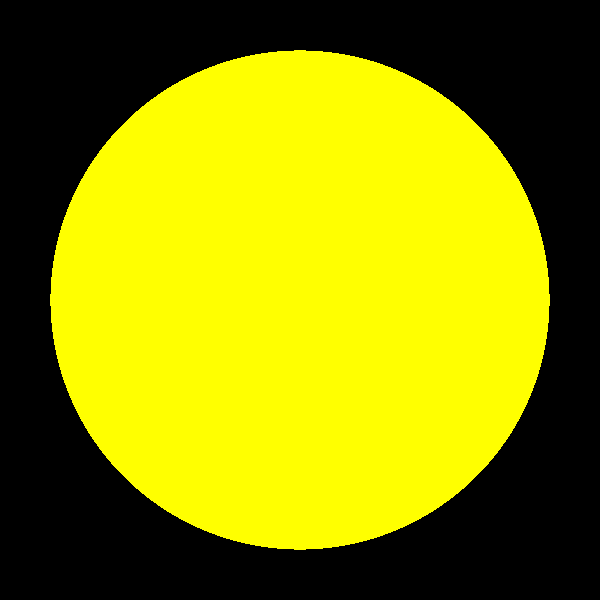

In [53]:
{
    let ls = Array::linspace(-300., 300., 600);
    let x = &ls.clone().into_shape([600, 1]).unwrap();
    let y = &ls.clone().into_shape([1, 600]).unwrap();
    let R = 250.;
    let c = (x*x + y*y)             
            .mapv(|v| u8::from(v < R*R))
            .mapv(|v| vec![255*v, 255*v, 0]);
    array_to_image2(&c).evcxr_display();
}

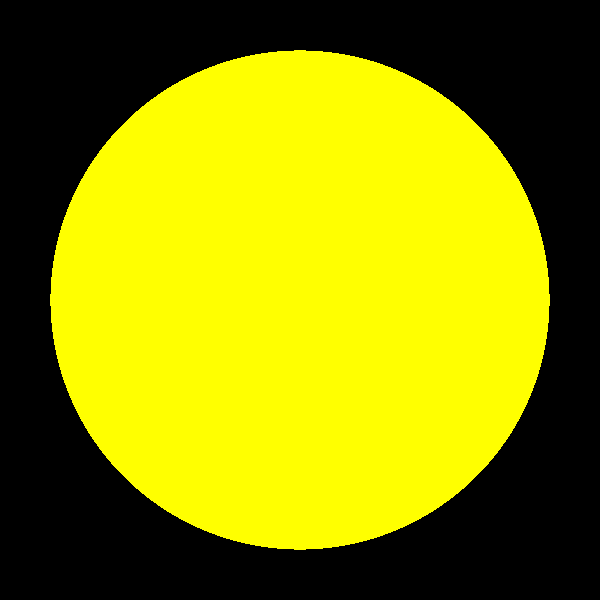

In [38]:
{
    let a1 = Array::linspace(-300., 300., 600);
    let x = &a1.clone().into_shape([600, 1]).unwrap();
    let y = &a1.clone().into_shape([1, 600]).unwrap();
    let c = (x*x + y*y) 
            .mapv(|v| v < 250f64.powi(2))
            .mapv(|v| 255*u8::from(v))
            .mapv(|v| vec![v,v,0u8]);
    array_to_image2(&c).evcxr_display();
}

In [ ]:
let mut c = Array::from_elem((600,600), vec![0u8;3]);
for y in 0..c.dim().0 {
    for x in 0..c.dim().1 {
        if (y as i32 -300).pow(2)+(x as i32 -300).pow(2) < 250i32.pow(2) {
            c[[y,x]] = vec![255,255,0];
        }
}
}
array_to_image2(&c).evcxr_display();

In [ ]:
{
let mut arr: Array3<u8> = Array3::zeros((600, 600, 3));
let x = &Array::linspace(-300., 300., 600).into_shape([600, 1]).unwrap();
let y = &x.clone().into_shape([1, 600]).unwrap();
let c = & (x*x+y*y).mapv(|v| {255*u8::from(v<300.*300.)});
arr.slice_mut(s![.., .., 0]).assign(c);
arr.slice_mut(s![.., .., 1]).assign(c);
array_to_image(&arr).evcxr_display();
}

In [ ]:
use ndarray::{arr2, arr3, stack, Axis};

In [ ]:
{let mut arr: Array3<u8> = Array3::zeros((600, 600, 3));
let x = &(Array::linspace(0., 600., 600).into_shape([600, 1]).unwrap()-300.);
let y = &x.clone().into_shape([1, 600]).unwrap();
let c1 = ((x*x + y*y)/180000.).mapv(|v| {( (1.-v)*255.) as u8});
let c2 = ((x*x + y*y)/180000.).mapv(|v| {( v*255.) as u8});
let x2 = &x.mapv(|x| { (200.- f64::abs(x)) });
let y2 = &y.mapv(|y| { (400.- f64::abs(y)) });
let c3 = ((x2*x2 + y2*y2)/180000.).mapv(|v| {((1.-v)*255.) as u8});
arr.slice_mut(s![.., .., 0]).assign(&c1);
arr.slice_mut(s![.., .., 1]).assign(&c2);
arr.slice_mut(s![.., .., 2]).assign(&c3);
let arr2 = stack! [Axis(2), c1, c2, c3];
dbg!(arr2.shape());
array_to_image(&arr2).evcxr_display();
}